In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
import tensorflow as tf
from tensorflow import keras
from keras_preprocessing.image import load_img

In [3]:
path ='./clothing-dataset-small/train/t-shirt/'
file = '1cab0eb2-60f6-4d0a-a380-9a07b834d855.jpg'
fullName = f'{path}/{file}'

In [4]:
img = load_img(fullName, target_size=(299,299))

In [5]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x16BB2BEC220>


In [6]:
x = np.array(img)
x.shape

(299, 299, 3)

In [28]:
from keras.applications.xception import Xception, preprocess_input, decode_predictions

In [29]:
model = Xception(weights='imagenet', input_shape=(299,299,3))

In [9]:
X = np.array([x])
X = preprocess_input(X)

In [10]:
pred = model.predict(X)
pred.shape

(1, 1000)

In [11]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.47058782),
  ('n04033995', 'quilt', 0.021494234),
  ('n04370456', 'sweatshirt', 0.016343094),
  ('n03188531', 'diaper', 0.016156502),
  ('n02730930', 'apron', 0.013485141)]]

### CNN - Transfer Learning

In [26]:
from keras_preprocessing.image import ImageDataGenerator

In [27]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [16]:
train_ds = train_gen.flow_from_directory('./clothing-dataset-small/train/',
                              target_size=(150,150),
                              batch_size=32)

Found 3068 images belonging to 10 classes.


In [17]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [19]:
X, y = next(train_ds)

In [22]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [23]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory('./clothing-dataset-small/validation/',
                                     target_size=(150,150),
                                     batch_size=32,
                                     shuffle=False
                                    )

Found 341 images belonging to 10 classes.


In [39]:
base_model = tf.keras.applications.Xception(weights='imagenet',
                                            include_top=False,
                                            input_shape=(150, 150, 3))

base_model.trainable = False

inputs = keras.Input(shape=(150,150,3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [55]:
preds = model.predict(X)

In [56]:
preds.shape

(32, 10)

In [58]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [59]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 34s 310ms/step - loss: 1.2099 - accuracy: 0.6780 - val_loss: 0.7955 - val_accuracy: 0.7830
Epoch 2/10
96/96 [==============================] - 29s 303ms/step - loss: 0.6167 - accuracy: 0.8191 - val_loss: 0.8804 - val_accuracy: 0.7742
Epoch 3/10
96/96 [==============================] - 17s 183ms/step - loss: 0.3612 - accuracy: 0.8716 - val_loss: 0.8278 - val_accuracy: 0.7977
Epoch 4/10
96/96 [==============================] - 35s 369ms/step - loss: 0.2532 - accuracy: 0.9042 - val_loss: 0.7921 - val_accuracy: 0.8035
Epoch 5/10
96/96 [==============================] - 11s 116ms/step - loss: 0.1879 - accuracy: 0.9351 - val_loss: 0.7802 - val_accuracy: 0.8152
Epoch 6/10
96/96 [==============================] - 11s 114ms/step - loss: 0.1055 - accuracy: 0.9648 - val_loss: 0.8239 - val_accuracy: 0.8123
Epoch 7/10
96/96 [==============================] - 11s 114ms/step - loss: 0.0824 - accuracy: 0.9739 - val_loss: 0.9718 - val_accuracy: 0.8123

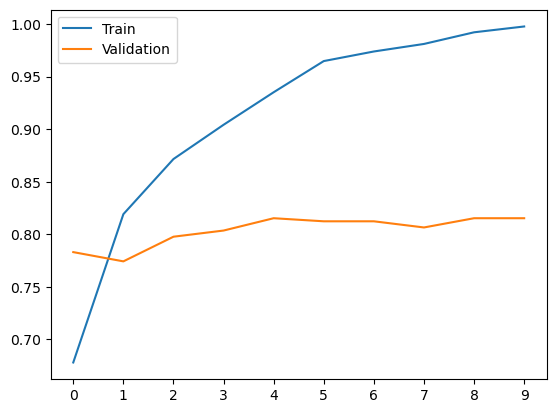

In [70]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xticks(np.arange(10))
plt.legend()
plt.show()

In [61]:
history.history

{'loss': [1.209897756576538,
  0.6167334914207458,
  0.3612062931060791,
  0.253212034702301,
  0.18785111606121063,
  0.105523020029068,
  0.0824485793709755,
  0.05811534449458122,
  0.03835832700133324,
  0.02236611396074295],
 'accuracy': [0.6779661178588867,
  0.8191003799438477,
  0.8715775609016418,
  0.9041721224784851,
  0.9351369142532349,
  0.9647979140281677,
  0.9739243984222412,
  0.9810951948165894,
  0.9921773076057434,
  0.9977183938026428],
 'val_loss': [0.7954729795455933,
  0.8803503513336182,
  0.827842116355896,
  0.7920525074005127,
  0.7801865339279175,
  0.8239478468894958,
  0.9717949628829956,
  0.869010329246521,
  0.8325257897377014,
  0.86012202501297],
 'val_accuracy': [0.7829912304878235,
  0.774193525314331,
  0.7976539731025696,
  0.803519070148468,
  0.8152492642402649,
  0.8123167157173157,
  0.8123167157173157,
  0.8064516186714172,
  0.8152492642402649,
  0.8152492642402649]}

### Adjusting the learning rate

In [73]:
def make_model(learning_rate = 0.01):
    
    base_model = tf.keras.applications.Xception(weights='imagenet',
                                            include_top=False,
                                            input_shape=(150, 150, 3))

    base_model.trainable = False

    #########################################################

    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [101]:
%%time
scores = {}
lrs = [0.0001, 0.001, 0.01, 0.1]

for lr in lrs:
    print(lr)
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    print('\n\n')

0.0001
Epoch 1/10
96/96 [==============================] - 15s 135ms/step - loss: 1.8853 - accuracy: 0.3686 - val_loss: 1.5735 - val_accuracy: 0.5044
Epoch 2/10
96/96 [==============================] - 16s 162ms/step - loss: 1.3583 - accuracy: 0.5808 - val_loss: 1.2381 - val_accuracy: 0.6276
Epoch 3/10
96/96 [==============================] - 18s 185ms/step - loss: 1.1245 - accuracy: 0.6496 - val_loss: 1.0668 - val_accuracy: 0.6716
Epoch 4/10
96/96 [==============================] - 14s 146ms/step - loss: 0.9896 - accuracy: 0.6894 - val_loss: 0.9644 - val_accuracy: 0.7009
Epoch 5/10
96/96 [==============================] - 16s 163ms/step - loss: 0.9002 - accuracy: 0.7164 - val_loss: 0.8920 - val_accuracy: 0.7390
Epoch 6/10
96/96 [==============================] - 17s 180ms/step - loss: 0.8353 - accuracy: 0.7350 - val_loss: 0.8366 - val_accuracy: 0.7507
Epoch 7/10
96/96 [==============================] - 24s 252ms/step - loss: 0.7836 - accuracy: 0.7490 - val_loss: 0.7972 - val_accuracy:

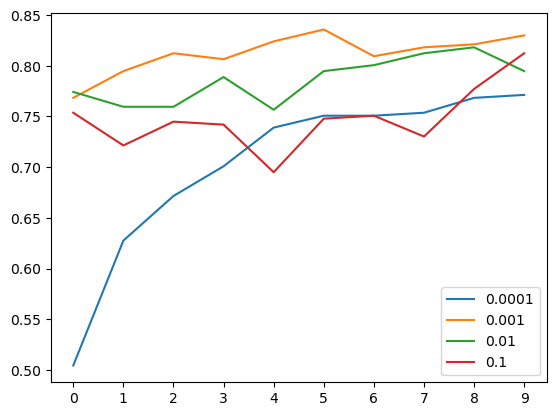

In [103]:
for lr , hist in scores.items():
    plt.plot(hist['val_accuracy'], label=lr)
    
plt.xticks(np.arange(10))    
plt.legend()

In [80]:
model.save_weights('model_v1.h5', save_format='h5')

### Checkpointintg

In [83]:
checkpoint = keras.callbacks.ModelCheckpoint('xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')

In [84]:
lr = 0.01
print(lr)
model = make_model(learning_rate=lr)
history = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=checkpoint)

0.01
Epoch 1/10
96/96 [==============================] - 50s 497ms/step - loss: 1.2692 - accuracy: 0.6741 - val_loss: 0.8229 - val_accuracy: 0.7859


C:\Users\MacCasa\anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/10
96/96 [==============================] - 11s 118ms/step - loss: 0.5544 - accuracy: 0.8188 - val_loss: 0.9015 - val_accuracy: 0.8123
Epoch 3/10
96/96 [==============================] - 24s 253ms/step - loss: 0.3846 - accuracy: 0.8739 - val_loss: 0.9560 - val_accuracy: 0.7742
Epoch 4/10
96/96 [==============================] - 11s 116ms/step - loss: 0.2335 - accuracy: 0.9140 - val_loss: 0.8900 - val_accuracy: 0.8035
Epoch 5/10
96/96 [==============================] - 13s 136ms/step - loss: 0.1705 - accuracy: 0.9374 - val_loss: 0.8382 - val_accuracy: 0.8211
Epoch 6/10
96/96 [==============================] - 20s 214ms/step - loss: 0.1127 - accuracy: 0.9619 - val_loss: 0.9659 - val_accuracy: 0.7889
Epoch 7/10
96/96 [==============================] - 11s 113ms/step - loss: 0.1032 - accuracy: 0.9612 - val_loss: 0.8804 - val_accuracy: 0.8211
Epoch 8/10
96/96 [==============================] - 11s 109ms/step - loss: 0.0609 - accuracy: 0.9817 - val_loss: 0.8637 - val_accuracy: 0.8270

In [86]:
def make_modelv2(learning_rate = 0.001, size_inner=100):
    
    base_model = tf.keras.applications.Xception(weights='imagenet',
                                            include_top=False,
                                            input_shape=(150, 150, 3))

    base_model.trainable = False

    #########################################################

    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)
    
    #########################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [99]:
tf.debugging.set_log_device_placement(True)

scores = {}
lr = 0.001

#with tf.device('/GPU:0'):

for size in [16, 32]:
    print(size)
    model = make_modelv2(learning_rate=lr, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    print('\n\n')

16
Epoch 1/10
96/96 [==============================] - 18s 157ms/step - loss: 1.2597 - accuracy: 0.5906 - val_loss: 0.8740 - val_accuracy: 0.7185
Epoch 2/10
96/96 [==============================] - 15s 153ms/step - loss: 0.7353 - accuracy: 0.7520 - val_loss: 0.6975 - val_accuracy: 0.7683
Epoch 3/10
96/96 [==============================] - 14s 141ms/step - loss: 0.5573 - accuracy: 0.8168 - val_loss: 0.6243 - val_accuracy: 0.7801
Epoch 4/10
96/96 [==============================] - 13s 134ms/step - loss: 0.4384 - accuracy: 0.8550 - val_loss: 0.5920 - val_accuracy: 0.7977
Epoch 5/10
96/96 [==============================] - 13s 131ms/step - loss: 0.3590 - accuracy: 0.8921 - val_loss: 0.5817 - val_accuracy: 0.8035
Epoch 6/10
96/96 [==============================] - 12s 120ms/step - loss: 0.3032 - accuracy: 0.9074 - val_loss: 0.6127 - val_accuracy: 0.8035
Epoch 7/10
96/96 [==============================] - 17s 177ms/step - loss: 0.2505 - accuracy: 0.9325 - val_loss: 0.5381 - val_accuracy: 0.8

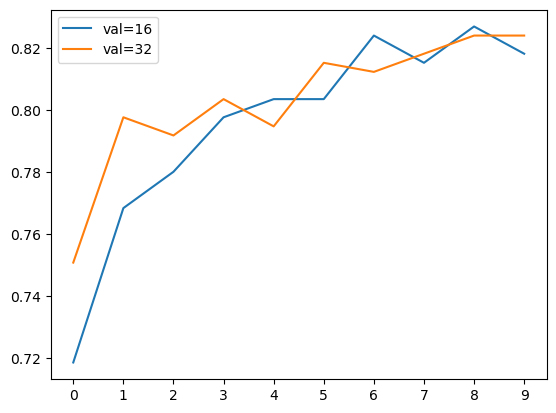

In [100]:
for size , hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))
    
plt.xticks(np.arange(10))    
_ = plt.legend()

In [104]:
def make_modelv3(learning_rate = 0.001, size_inner=100, droprate=0.0):
    
    base_model = tf.keras.applications.Xception(weights='imagenet',
                                            include_top=False,
                                            input_shape=(150, 150, 3))

    base_model.trainable = False

    #########################################################

    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)
    
    #########################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [ ]:
scores = {}
lr = 0.001
size = 32

for droprate in [0.0, 0.2, 0.4]:
    print(droprate)
    model = make_modelv2(learning_rate=lr, size_inner=size)
    history = model.fit(train_ds, epochs=15, validation_data=val_ds)
    scores[size] = history.history
    print('\n\n')

0.0
Epoch 1/15
96/96 [==============================] - 47s 469ms/step - loss: 1.1448 - accuracy: 0.6167 - val_loss: 0.6971 - val_accuracy: 0.7918
Epoch 2/15
96/96 [==============================] - 44s 459ms/step - loss: 0.6250 - accuracy: 0.7901 - val_loss: 0.5994 - val_accuracy: 0.8094
Epoch 3/15
96/96 [==============================] - 28s 294ms/step - loss: 0.4743 - accuracy: 0.8452 - val_loss: 0.5835 - val_accuracy: 0.8035
Epoch 4/15
96/96 [==============================] - 14s 146ms/step - loss: 0.3763 - accuracy: 0.8765 - val_loss: 0.5568 - val_accuracy: 0.8123
Epoch 5/15
96/96 [==============================] - 11s 113ms/step - loss: 0.3028 - accuracy: 0.9091 - val_loss: 0.5237 - val_accuracy: 0.8240
Epoch 6/15
96/96 [==============================] - 11s 114ms/step - loss: 0.2390 - accuracy: 0.9361 - val_loss: 0.5627 - val_accuracy: 0.8065
Epoch 7/15
57/96 [================>.............] - ETA: 4s - loss: 0.1983 - accuracy: 0.9402

In [ ]:
for size , hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('DropRate=%s' % droprate))
    
plt.xticks(np.arange(10))    
_ = plt.legend()